In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# 1. Load the dataset

url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/lithium-ion%20batteries.csv"
df = pd.read_csv(url)

In [6]:
# 2. Basic Exploration

print("\nDataset Dimensions:")
print(df.shape)

print("\nData Types and Info:")
print(df.info())

print("\nFirst 5 Rows:")
print(df.head())


Dataset Dimensions:
(339, 11)

Data Types and Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Materials Id           339 non-null    object 
 1   Formula                338 non-null    object 
 2   Spacegroup             339 non-null    object 
 3   Formation Energy (eV)  339 non-null    float64
 4   E Above Hull (eV)      339 non-null    object 
 5   Band Gap (eV)          338 non-null    float64
 6   Nsites                 339 non-null    int64  
 7   Density (gm/cc)        339 non-null    float64
 8   Volume                 339 non-null    float64
 9   Has Bandstructure      339 non-null    bool   
 10  Crystal System         338 non-null    object 
dtypes: bool(1), float64(4), int64(1), object(5)
memory usage: 26.9+ KB
None

First 5 Rows:
  Materials Id       Formula Spacegroup  Formation Energy (eV)  \
0    mp-

In [7]:
# 3. Summary Statistics

print("\nSummary Statistics:")
print(df.describe(include='all'))


Summary Statistics:
       Materials Id   Formula Spacegroup  Formation Energy (eV)  \
count           339       338        339             339.000000   
unique          339       114         44                    NaN   
top       mp-767320  LiFeSiO4         P1                    NaN   
freq              1        42         72                    NaN   
mean            NaN       NaN        NaN              -2.616950   
std             NaN       NaN        NaN               0.183809   
min             NaN       NaN        NaN              -2.985000   
25%             NaN       NaN        NaN              -2.757500   
50%             NaN       NaN        NaN              -2.605000   
75%             NaN       NaN        NaN              -2.525500   
max             NaN       NaN        NaN              -2.012000   

       E Above Hull (eV)  Band Gap (eV)      Nsites  Density (gm/cc)  \
count                339     338.000000  339.000000       339.000000   
unique               109      

In [8]:
# 4. Data Handling & Cleaning

print("\nMissing Values:")
print(df.isnull().sum())

df = df.fillna(df.median(numeric_only=True))

for col in df.select_dtypes(include='object'):
    df[col].fillna(df[col].mode()[0], inplace=True)


Missing Values:
Materials Id             0
Formula                  1
Spacegroup               0
Formation Energy (eV)    0
E Above Hull (eV)        0
Band Gap (eV)            1
Nsites                   0
Density (gm/cc)          0
Volume                   0
Has Bandstructure        0
Crystal System           1
dtype: int64


/tmp/ipython-input-3792196603.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


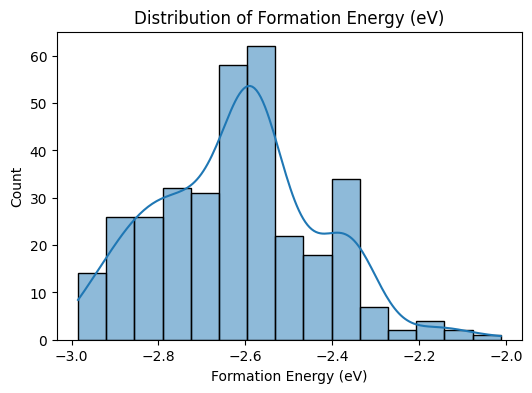

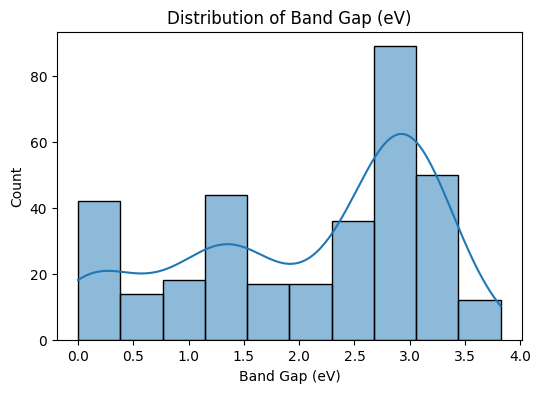

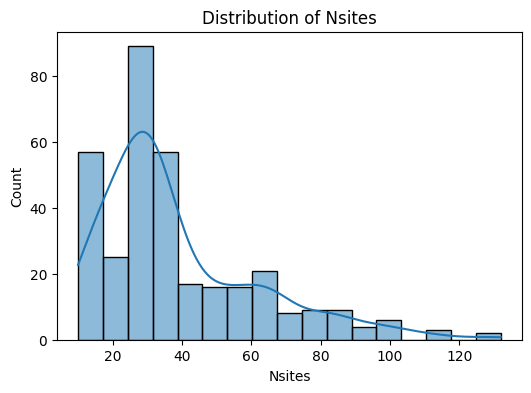

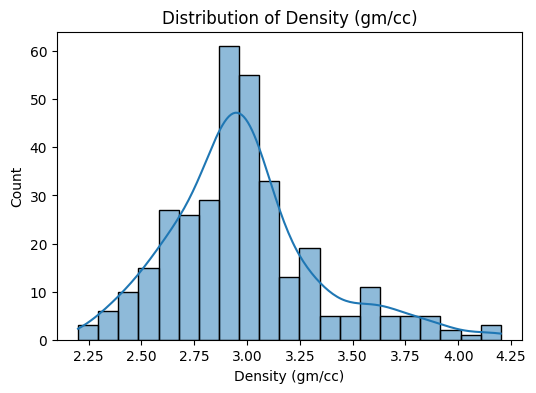

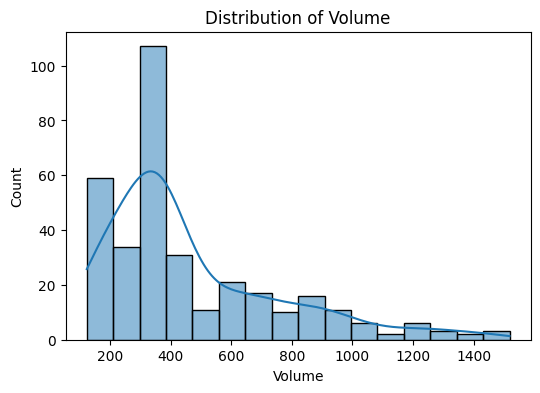

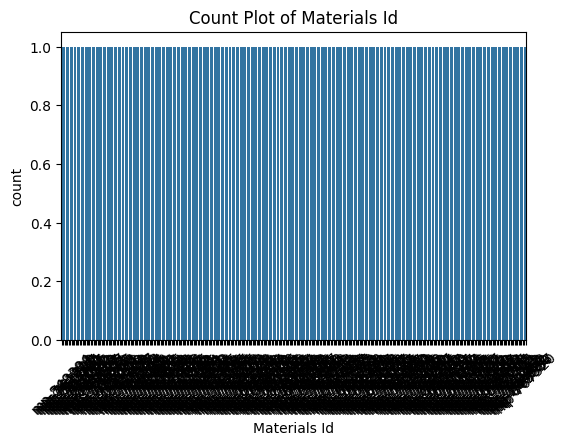

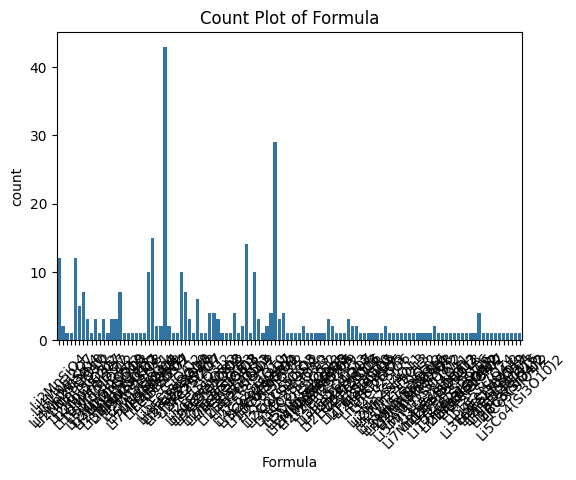

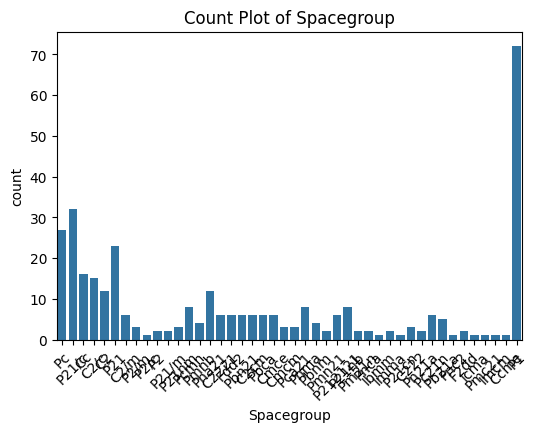

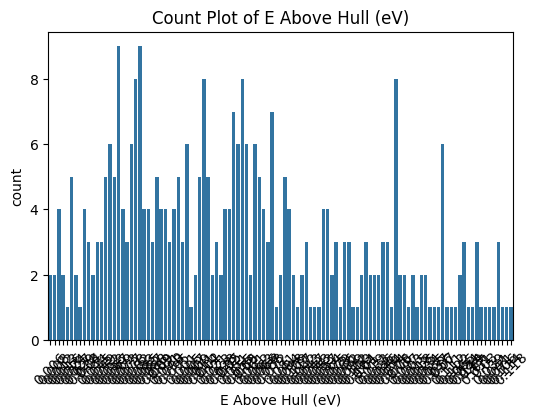

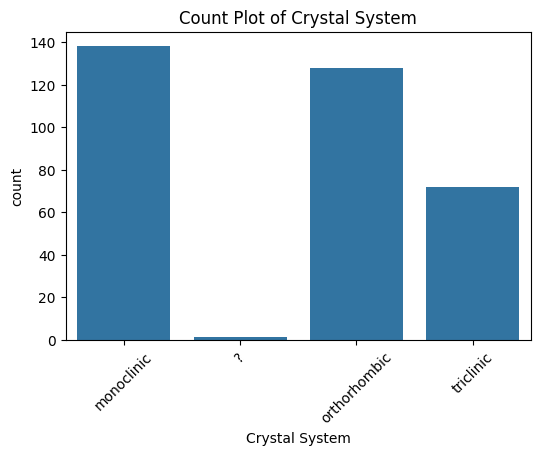

In [9]:
# 5. Univariate Analysis

num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include='object').columns

# Histograms for numeric columns
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# Count plots for categorical columns
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.show()


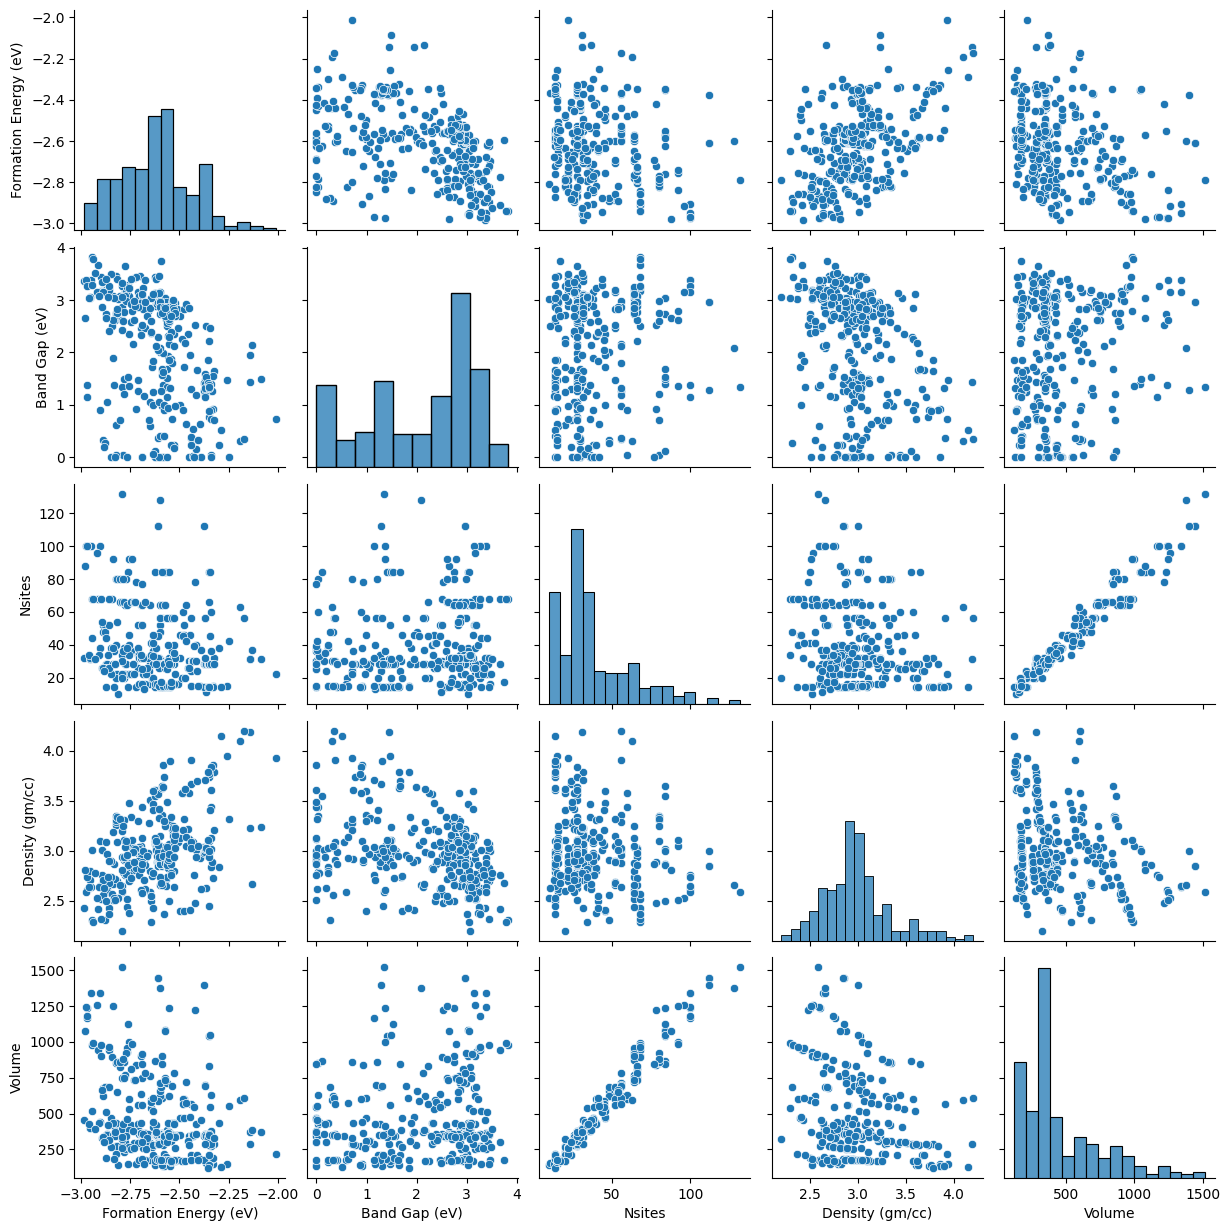

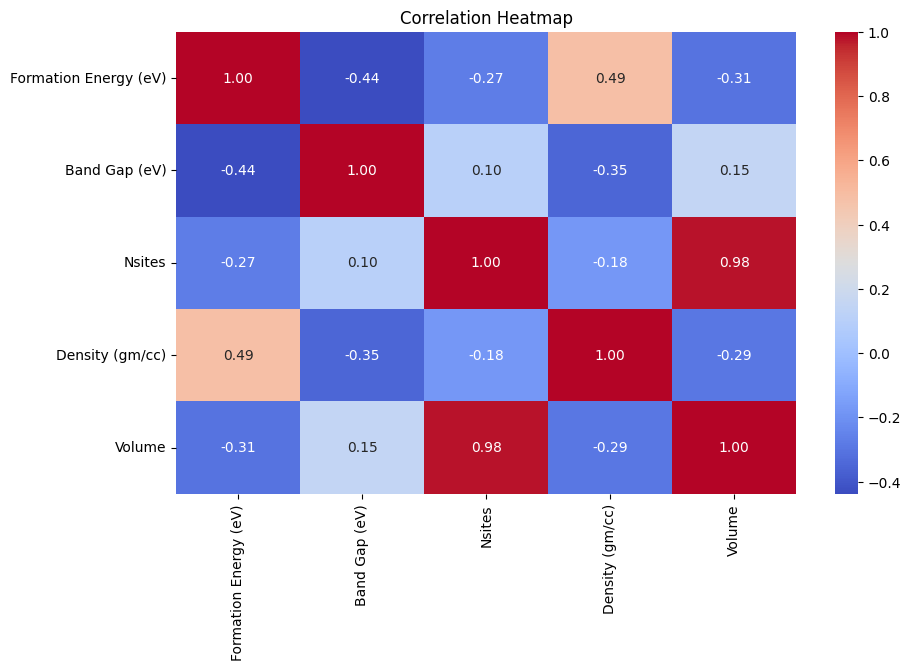

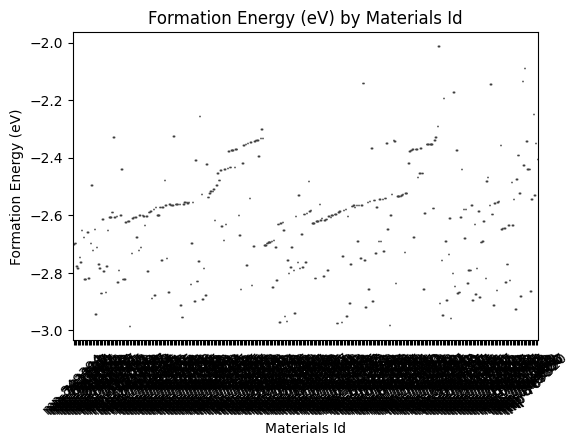

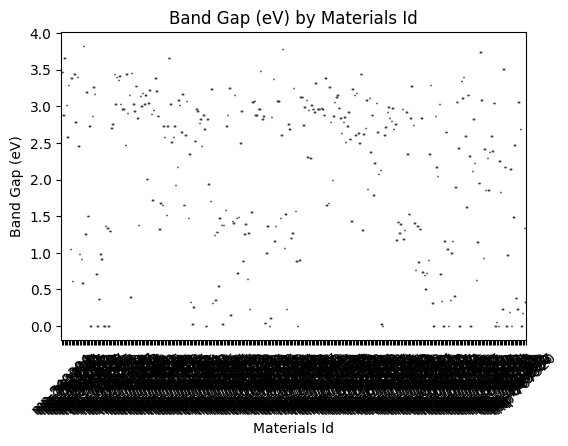

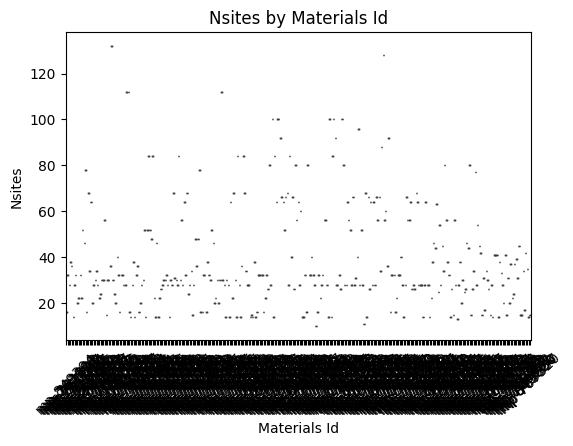

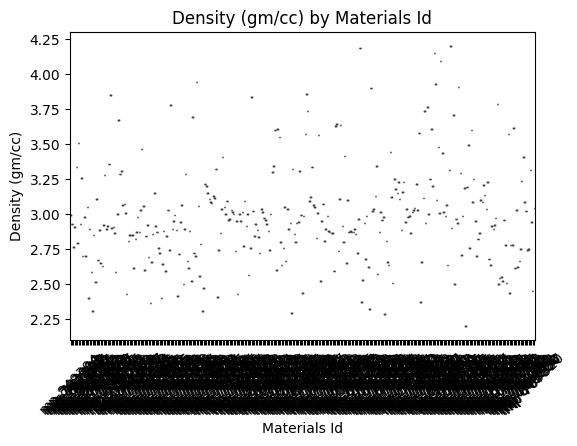

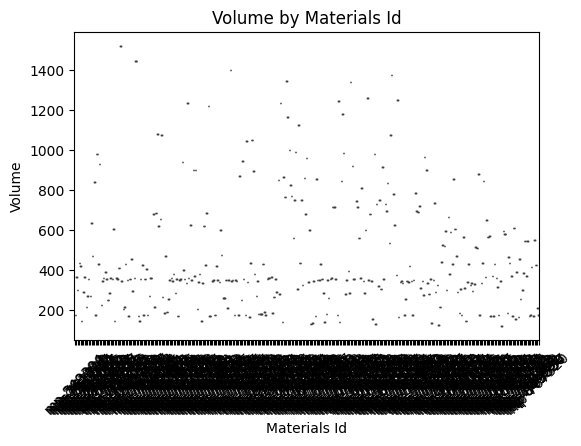

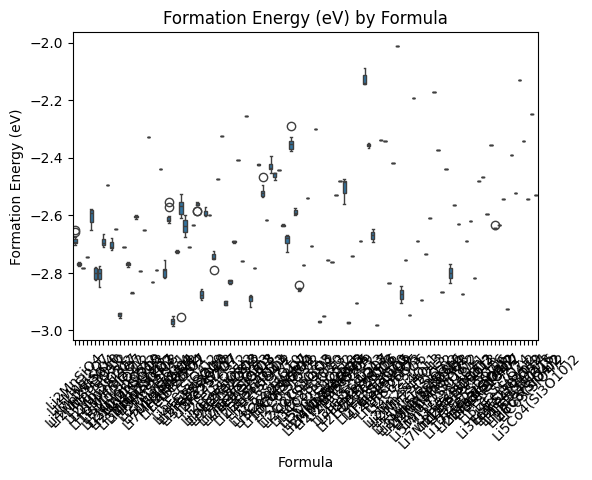

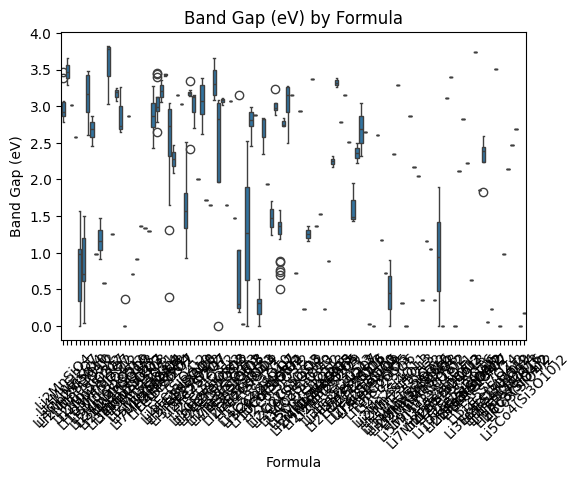

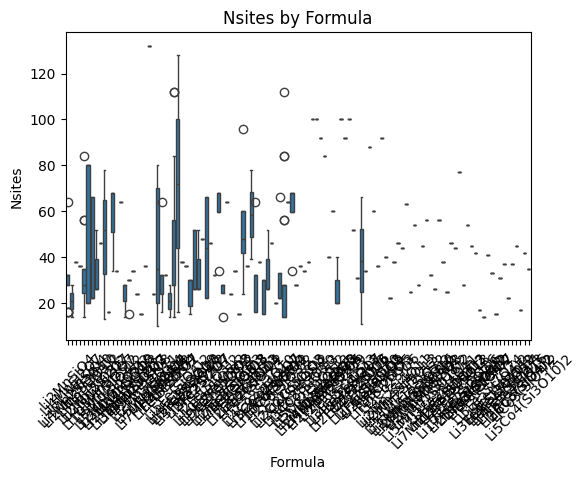

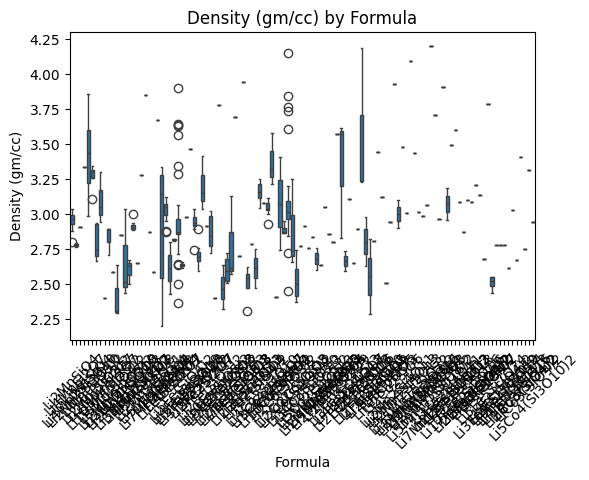

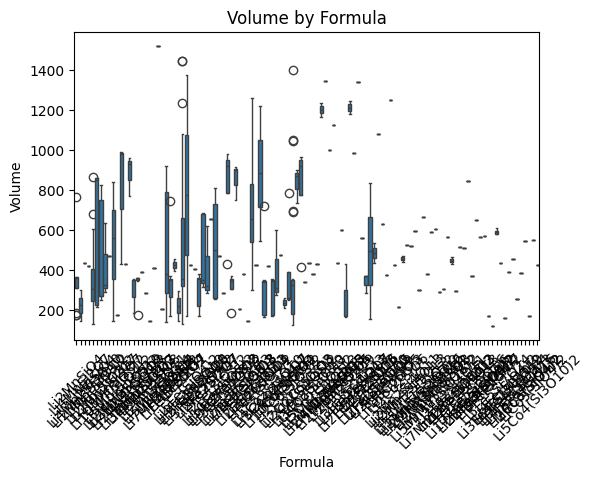

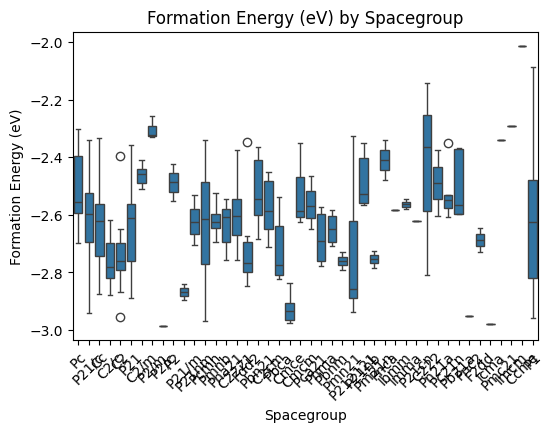

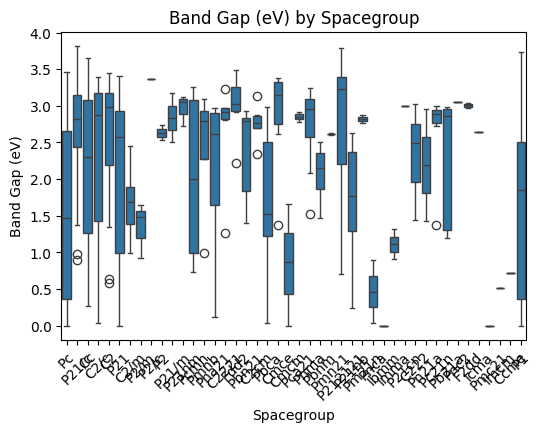

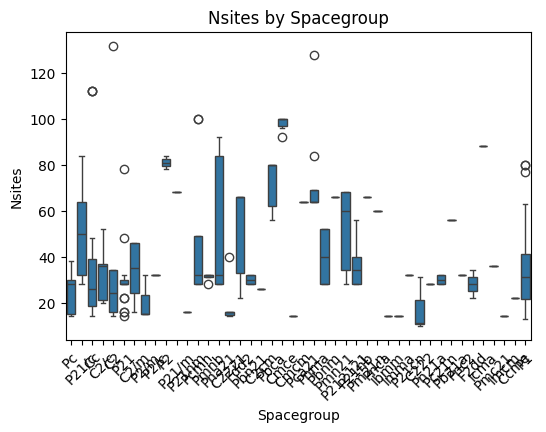

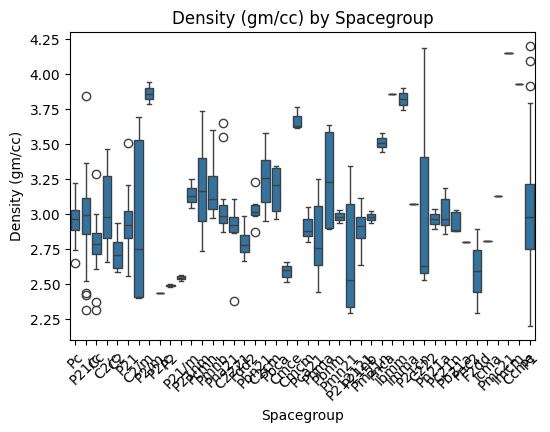

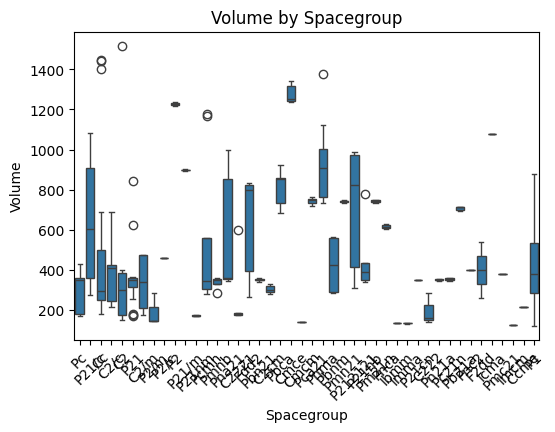

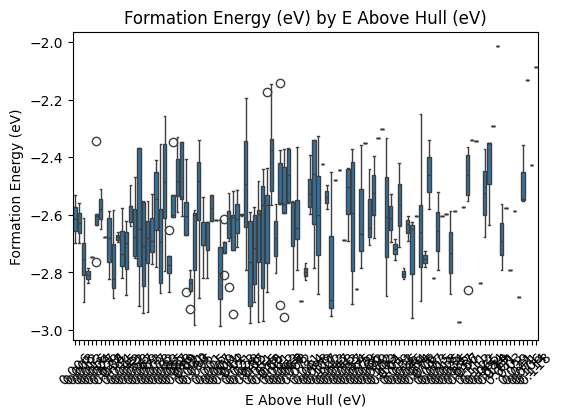

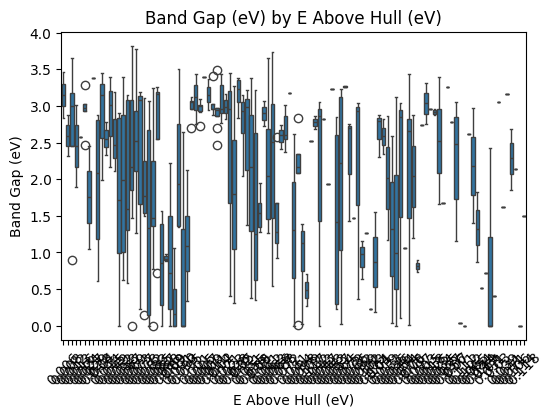

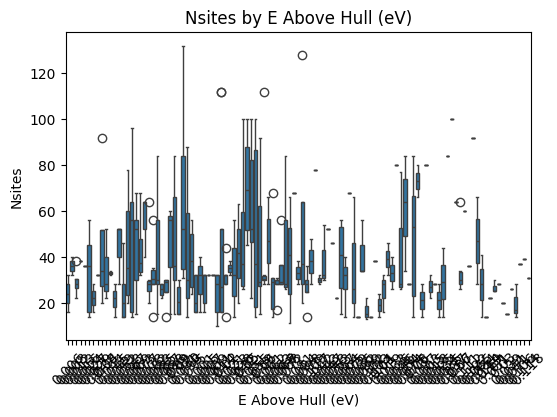

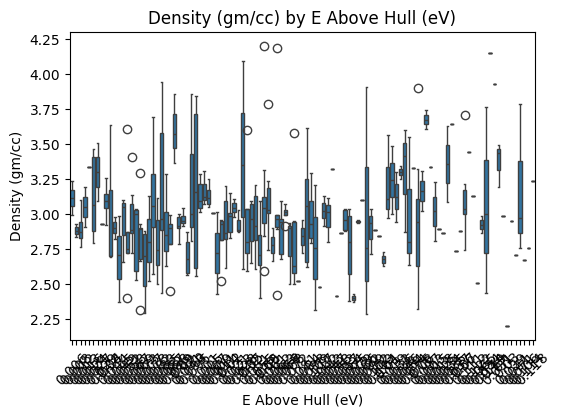

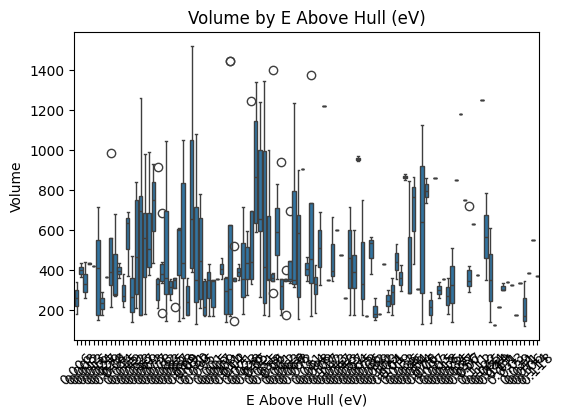

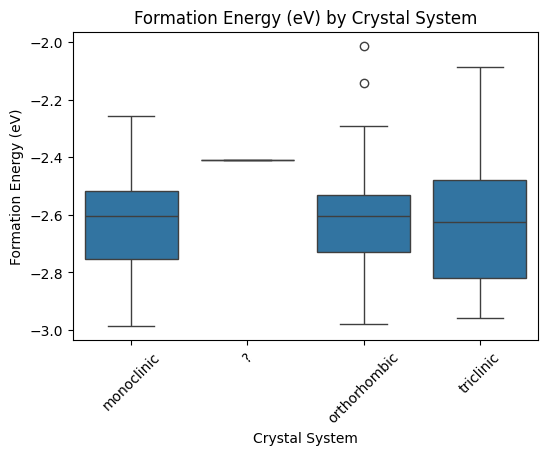

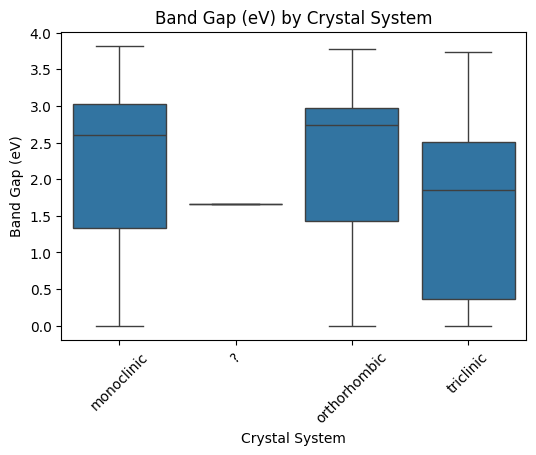

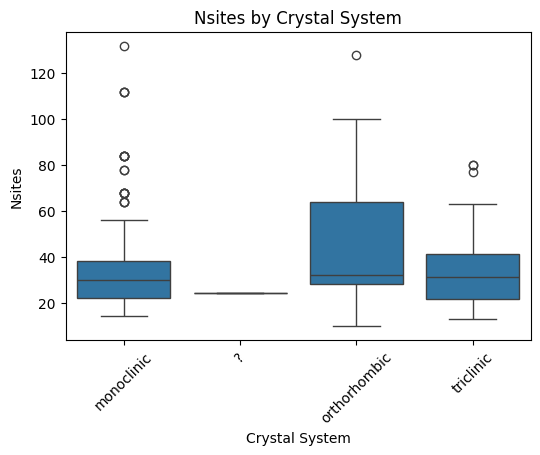

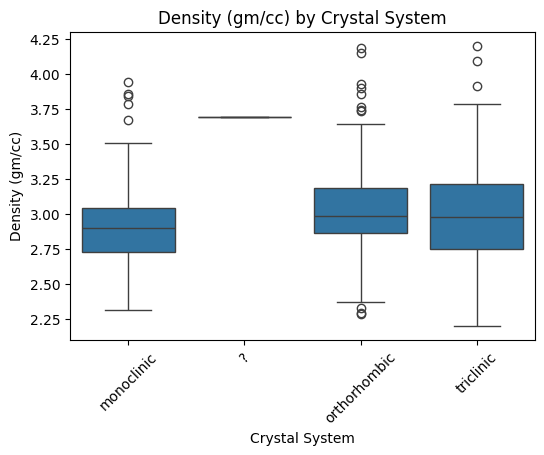

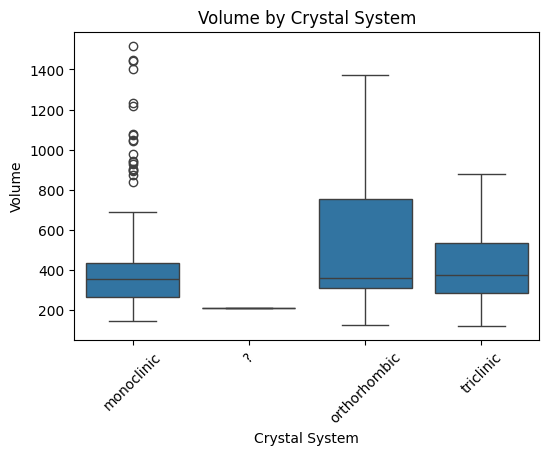

In [10]:
# 6. Bivariate Analysis

sns.pairplot(df[num_cols])
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Boxplots of numeric vs categorical (if categorical exists)
for col in cat_cols:
    for num in num_cols:
        plt.figure(figsize=(6,4))
        sns.boxplot(x=col, y=num, data=df)
        plt.title(f"{num} by {col}")
        plt.xticks(rotation=45)
        plt.show()

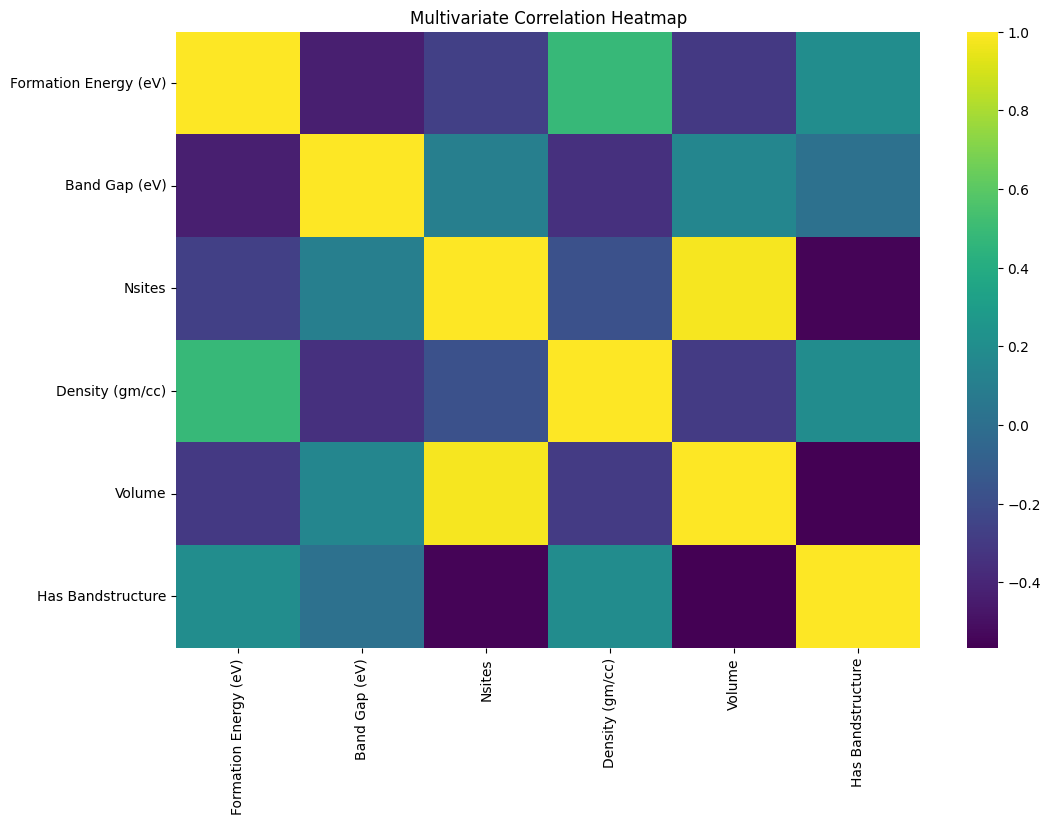

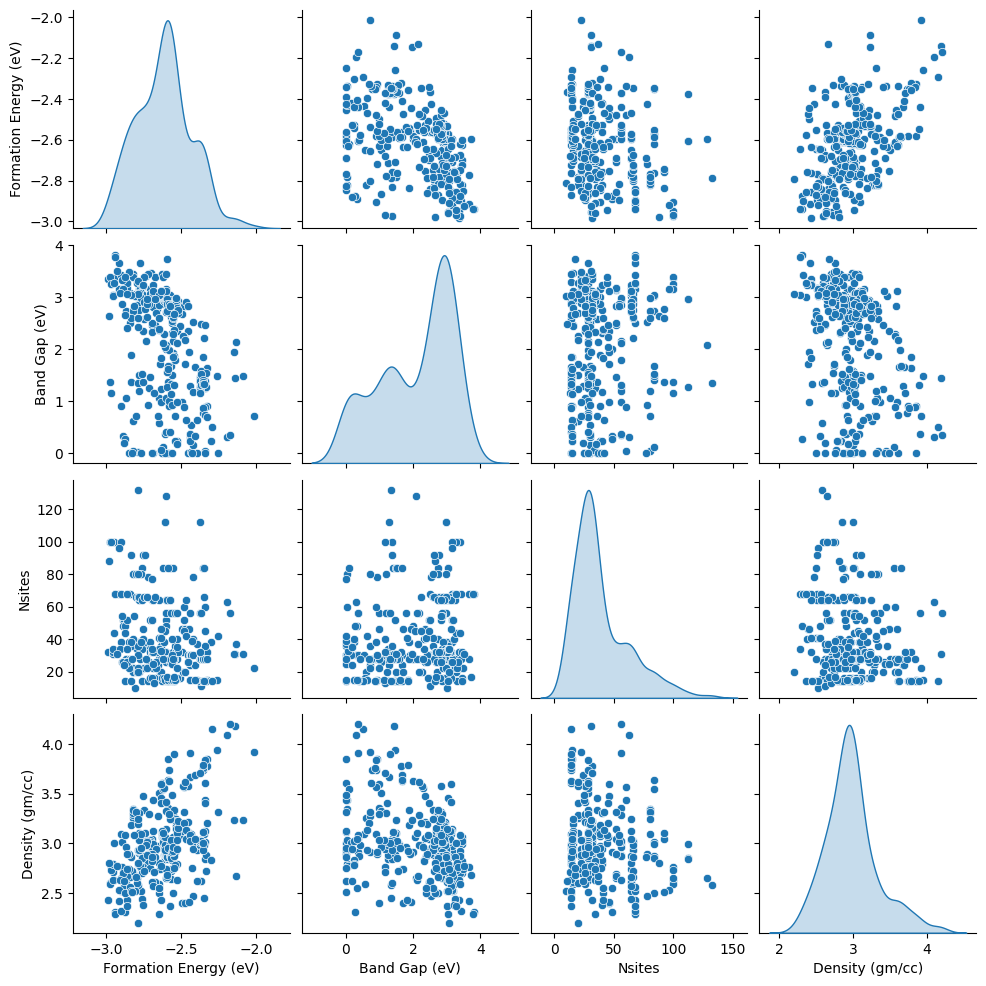

In [12]:
# 7. Multivariate Analysis

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), cmap="viridis", annot=False)
plt.title("Multivariate Correlation Heatmap")
plt.show()

# Pairplot for selected top variables
selected_cols = num_cols[:4]  # choose first 4 numeric features if many exist
sns.pairplot(df[selected_cols], diag_kind="kde")
plt.show()

In [13]:
print("Project Phase 1 Completed")
print("Anubhav Pawan")
print("22BDS0316")

Project Phase 1 Completed
Anubhav Pawan
22BDS0316
